We use the Python library ["Epidemics on Networks" developed by Kiss, Miller & Simon](https://github.com/springer-math/Mathematics-of-Epidemics-on-Networks).

The library must be installed using pip:

    pip install EoN
  

The library documentation is [available here](http://epidemicsonnetworks.readthedocs.io/en/latest/). 

In [1]:
import EoN
import networkx as nx
import numpy as np
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Homogeneous network

We simulate the spread of an SIR on an Erdos-Renyi graph with constant recovery rate.

In [3]:
N=10000
p=0.001
G=nx.fast_gnp_random_graph(N, p)

In [4]:
nx.is_connected(G)

True

In [5]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 49860
Average degree:   9.9720


---
# The epidemic threshold for this network can be approximated as $\lambda_c = \frac{\mu}{\langle k \rangle}$

In [6]:
mu=0.2

In [7]:
avg_deg1=2*len(G.edges)/N
lc=mu/avg_deg1
print(lc)

0.020056157240272765


# As expected for this network, we have $\langle k^2 \rangle \sim \langle k \rangle^2 + \langle k \rangle$

In [8]:
sum_k2=0
for i in G.nodes():
    k=G.degree(i)
    sum_k2+=k*k
avg_k2=sum_k2/N
print(avg_k2)  

109.5058


In [9]:
avg_deg1**2 + avg_deg1

109.41278399999999

## Simulations of an SIR process
We simulate 20 realizations of a SIR model for increasing values of $\lambda$ using the [fast_SIR function of EoN](https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.fast_SIR.html?highlight=fast_SIR)

In [10]:
final_size=defaultdict(list)

for lambd in np.geomspace(0.0001, 1.0, 20):
    
    for r in range(0, 20):
        t, S, I, R = EoN.fast_SIR(G, lambd, mu, rho=0.05)
        
        final_size[lambd].append(R[-1]/N)

In [11]:
homo_net_size=pd.DataFrame.from_dict(final_size)

In [12]:
homo_net_size.head()

,0.000100,0.000162,0.000264,0.000428,0.000695,0.001129,0.001833,0.002976,0.004833,0.007848,0.012743,0.020691,0.033598,0.054556,0.088587,0.143845,0.233572,0.379269,0.615848,1.000000
0,0.0501,0.0503,0.0511,0.0512,0.0519,0.0535,0.0548,0.0580,0.0665,0.0758,0.1052,0.2712,0.5639,0.8524,0.9472,0.9848,0.9954,0.9979,0.9996,0.9998
1,0.0502,0.0500,0.0509,0.0513,0.0514,0.0524,0.0549,0.0571,0.0633,0.0761,0.1193,0.2390,0.6001,0.8486,0.9468,0.9846,0.9964,0.9991,0.9995,0.9998
2,0.0504,0.0502,0.0503,0.0513,0.0521,0.0529,0.0537,0.0554,0.0625,0.0807,0.1090,0.2239,0.5677,0.8432,0.9479,0.9859,0.9956,0.9983,0.9998,0.9999
3,0.0501,0.0505,0.0513,0.0516,0.0518,0.0528,0.0552,0.0588,0.0643,0.0799,0.1082,0.2476,0.5702,0.8410,0.9470,0.9834,0.9954,0.9988,0.9993,0.9999
4,0.0501,0.0502,0.0501,0.0515,0.0524,0.0528,0.0541,0.0572,0.0662,0.0734,0.0972,0.2600,0.5952,0.8345,0.9512,0.9816,0.9960,0.9990,0.9999,0.9997


Text(0.5, 0, '$\\lambda$')

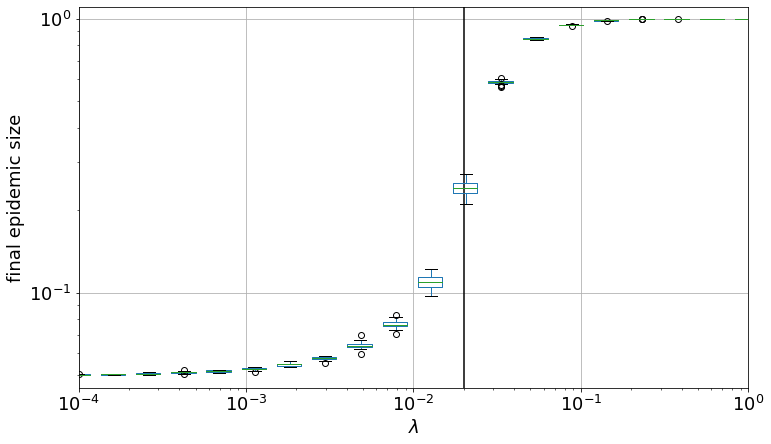

In [13]:
plt.figure(figsize=(12,7))

homo_net_size.boxplot(positions=np.array(homo_net_size.columns), 
                      widths=np.array(homo_net_size.columns)/3)

plt.vlines(x=lc, ymin=0.045, ymax=1.1)

plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0001, 1.0)
plt.ylim(0.045, 1.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('final epidemic size', fontsize=18)
plt.xlabel('$\lambda$', fontsize=18)

# Barabàsi-Albert model network

In [14]:
N=10000
AB=nx.barabasi_albert_graph(N, 5)

In [15]:
nx.is_connected(AB)

True

In [16]:
print(nx.info(AB))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 49975
Average degree:   9.9950


In [17]:
sum_k2=0
for i in AB.nodes():
    k=AB.degree(i)
    sum_k2+=k*k
avg_k2=sum_k2/N
print(avg_k2)    

276.2968


In [18]:
avg_deg=2*len(AB.edges)/N
print(avg_deg)

9.995


# The threshold can be approximated as $\lambda_c \sim \mu \frac{\langle k \rangle}{\langle k^2 \rangle - \langle k \rangle}$ 

In [19]:
lambda_c=mu*avg_deg/(avg_k2-avg_deg)
print(lambda_c)

0.007506520797080605


In [20]:
lc/lambda_c

2.6718313027352028

## Simulations of an SIR process
We simulate 100 realizations of a SIR model for increasing values of $\lambda$

In [21]:
final_size_AB=defaultdict(list)

for lambd in np.geomspace(0.0001, 1.0, 20):
    for r in range(0, 100):
        
        t, S, I, R = EoN.fast_SIR(AB, lambd, mu, rho=0.05)
        
        final_size_AB[lambd].append(R[-1]/N)

In [22]:
sf_net_size=pd.DataFrame.from_dict(final_size_AB)

In [23]:
sf_net_size.tail()

,0.000100,0.000162,0.000264,0.000428,0.000695,0.001129,0.001833,0.002976,0.004833,0.007848,0.012743,0.020691,0.033598,0.054556,0.088587,0.143845,0.233572,0.379269,0.615848,1.000000
95,0.0503,0.0502,0.0506,0.0509,0.0515,0.0534,0.0555,0.0577,0.0663,0.1064,0.1941,0.3663,0.5795,0.7752,0.9154,0.9699,0.9923,0.9984,0.9999,1.0000
96,0.0500,0.0501,0.0509,0.0511,0.0512,0.0519,0.0568,0.0600,0.0780,0.1084,0.1879,0.3511,0.5834,0.7702,0.9121,0.9689,0.9928,0.9975,0.9998,1.0000
97,0.0501,0.0505,0.0505,0.0505,0.0520,0.0532,0.0570,0.0588,0.0721,0.0945,0.2215,0.3587,0.5934,0.7751,0.9055,0.9703,0.9909,0.9979,0.9994,1.0000
98,0.0502,0.0503,0.0504,0.0516,0.0522,0.0522,0.0543,0.0621,0.0756,0.1055,0.2012,0.3626,0.5872,0.7753,0.9062,0.9686,0.9900,0.9983,0.9998,1.0000
99,0.0504,0.0507,0.0506,0.0512,0.0517,0.0524,0.0571,0.0600,0.0710,0.0956,0.1832,0.3797,0.5949,0.7831,0.9096,0.9659,0.9893,0.9985,0.9994,0.9999


Text(0.5, 0, '$\\lambda$')

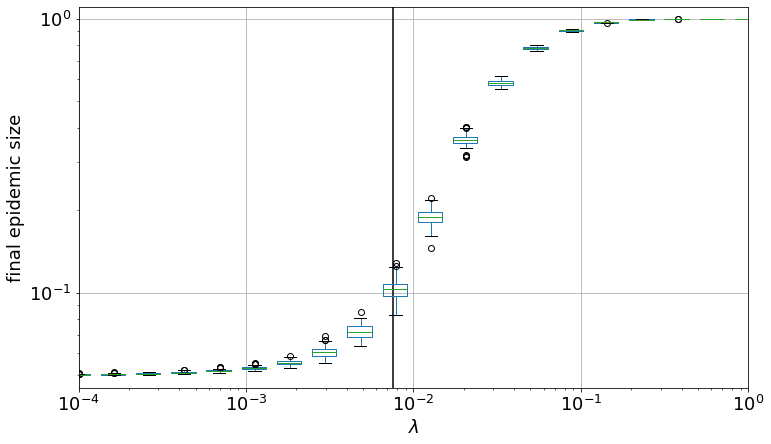

In [24]:
plt.figure(figsize=(12,7))

#homo_net_size.boxplot(positions=np.array(homo_net_size.columns), widths=np.array(homo_net_size.columns)/3 )

plt.vlines(x=lambda_c, ymin=0.04, ymax=1.1)
sf_net_size.boxplot(positions=np.array(sf_net_size.columns), widths=np.array(sf_net_size.columns)/3)

plt.yscale('log')
plt.xscale('log')
plt.xlim(0.0001, 1.0)
plt.ylim(0.045, 1.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('final epidemic size', fontsize=18)
plt.xlabel('$\lambda$', fontsize=18)

# Configuration model network

We can use the configuration model to generate a network with a given power-law degree distribution. By setting $\gamma=2.1$, we expect to see more fluctuations in the degree distribution.

We create a function that samples from a power-law distribution between $k_{min}$ and $k_{max}$ with exponent $\gamma$

In [25]:
def get_activity(x0,x1,g):
    y=random.uniform(0,1)
    
    e=g+1.
    
    a=((x1**e-x0**e)*y+x0**e)**(1./e)
    
    return a

In [26]:
N=10000
kmin=2
kmax=N-1
a=[]
for i in range(N):
    act=get_activity(kmin,kmax,-2.1)
    
    a.append(int(round(act)))

#we need the sum of the degree sequence to be even to properly run the configuration model
if sum(a)%2==0:
    G1=nx.configuration_model(a)
else:
    a[-1]+=1
    G1=nx.configuration_model(a)

In [27]:
nx.is_connected(G1)

True

In [28]:
print(nx.info(G1))

Name: 
Type: MultiGraph
Number of nodes: 10000
Number of edges: 68448
Average degree:  13.6896


In [29]:
G1=nx.Graph(G1)

In [30]:
G1.remove_edges_from(nx.selfloop_edges(G1))

In [31]:
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 48916
Average degree:   9.7832


In [32]:
nx.is_connected(G1)

True

In [33]:
sum_k2=0
for i in G1.nodes():
    k=G1.degree(i)
    sum_k2+=k*k
avg_k2=sum_k2/N
print(avg_k2)

4149.2654


In [34]:
avg_deg=2*len(G1.edges)/N
print(avg_deg)

9.7832


In [35]:
lambda_c1=mu*avg_deg/(avg_k2-avg_deg)
print(lambda_c1)

0.0004726774764244668


In [36]:
lc/lambda_c1

42.430956075982415

## Simulations of an SIR process
We simulate 100 realizations of a SIR model for increasing values of $\lambda$

In [37]:
final_size_conf=defaultdict(list)

for lambd in np.geomspace(0.0001, 1.0, 20):
    for r in range(0, 20):
        
        t, S, I, R = EoN.fast_SIR(G1, lambd, mu, rho=0.05)
        
        final_size_conf[lambd].append(R[-1]/N)

In [38]:
conf_net_size=pd.DataFrame.from_dict(final_size_conf)

Text(0.5, 0, '$\\lambda$')

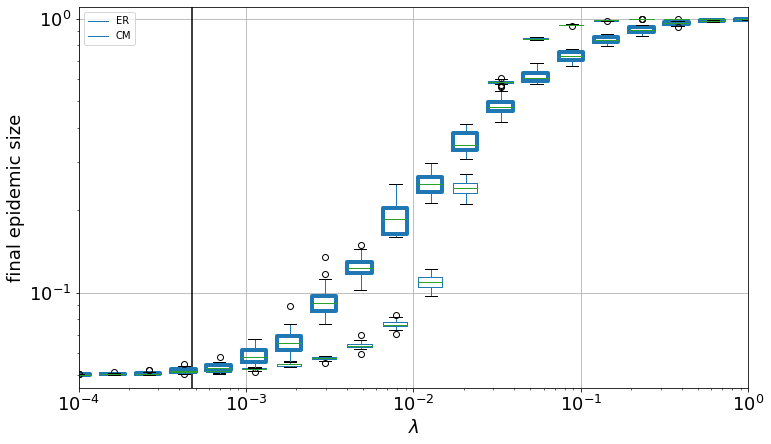

In [39]:
plt.figure(figsize=(12,7))

boxprops1 = dict(linestyle='-', linewidth=4, color='b')

homo_net_size.boxplot(positions=np.array(homo_net_size.columns), widths=np.array(homo_net_size.columns)/3)

conf_net_size.boxplot(positions=np.array(conf_net_size.columns), widths=np.array(conf_net_size.columns)/3, boxprops=boxprops1)

plt.vlines(x=lambda_c1, ymin=0.04, ymax=1.1)
plt.legend(['ER','CM'])
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.0001, 1.0)
plt.ylim(0.045, 1.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('final epidemic size', fontsize=18)
plt.xlabel('$\lambda$', fontsize=18)